## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  17.329122   846.726200  0.131563   2.775860  1.456258
1  64.355738  1516.446447  0.453305  10.241882  1.401853
2  19.288437   709.964478  0.706152   1.748535  1.652194
3  84.217727   928.096401  0.849962   3.947501  1.443426
4  20.052723   472.029331  0.376297   3.718860  1.431561


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.91263 | train_mse: 4.11482 | train_mae: 1.59052 |  0:00:00s
epoch 1  | loss: 0.39516 | train_mse: 5.41246 | train_mae: 1.6112  |  0:00:00s
epoch 2  | loss: 0.33252 | train_mse: 3.75113 | train_mae: 1.30409 |  0:00:00s


epoch 3  | loss: 0.51553 | train_mse: 4.01905 | train_mae: 1.38012 |  0:00:00s
epoch 4  | loss: 0.36845 | train_mse: 3.47294 | train_mae: 1.22914 |  0:00:00s
epoch 5  | loss: 0.30785 | train_mse: 2.14421 | train_mae: 0.95021 |  0:00:00s


epoch 6  | loss: 0.36885 | train_mse: 1.89193 | train_mae: 0.90287 |  0:00:00s
epoch 7  | loss: 0.45477 | train_mse: 1.57652 | train_mae: 0.84077 |  0:00:00s
epoch 8  | loss: 0.37913 | train_mse: 1.35436 | train_mae: 0.83167 |  0:00:00s


epoch 9  | loss: 0.338   | train_mse: 0.70153 | train_mae: 0.64036 |  0:00:00s
epoch 10 | loss: 0.33997 | train_mse: 0.52768 | train_mae: 0.56019 |  0:00:01s
epoch 11 | loss: 0.25527 | train_mse: 0.72253 | train_mae: 0.63603 |  0:00:01s


epoch 12 | loss: 0.27527 | train_mse: 0.95775 | train_mae: 0.66858 |  0:00:01s
epoch 13 | loss: 0.29302 | train_mse: 0.78195 | train_mae: 0.59818 |  0:00:01s
epoch 14 | loss: 0.19174 | train_mse: 0.47878 | train_mae: 0.47485 |  0:00:01s


epoch 15 | loss: 0.35448 | train_mse: 0.45013 | train_mae: 0.43841 |  0:00:01s
epoch 16 | loss: 0.29664 | train_mse: 0.54054 | train_mae: 0.4955  |  0:00:01s
epoch 17 | loss: 0.18983 | train_mse: 0.4826  | train_mae: 0.46489 |  0:00:01s


epoch 18 | loss: 0.18194 | train_mse: 0.53192 | train_mae: 0.51062 |  0:00:01s
epoch 19 | loss: 0.26603 | train_mse: 0.47465 | train_mae: 0.49403 |  0:00:01s
epoch 20 | loss: 0.27033 | train_mse: 0.29822 | train_mae: 0.39744 |  0:00:01s


epoch 21 | loss: 0.31088 | train_mse: 0.18517 | train_mae: 0.31878 |  0:00:02s
epoch 22 | loss: 0.20915 | train_mse: 0.16713 | train_mae: 0.29837 |  0:00:02s
epoch 23 | loss: 0.17875 | train_mse: 0.19056 | train_mae: 0.30199 |  0:00:02s


epoch 24 | loss: 0.26526 | train_mse: 0.24234 | train_mae: 0.3324  |  0:00:02s
epoch 25 | loss: 0.27514 | train_mse: 0.21723 | train_mae: 0.31484 |  0:00:02s


epoch 26 | loss: 0.1223  | train_mse: 0.1918  | train_mae: 0.31128 |  0:00:02s
epoch 27 | loss: 0.20986 | train_mse: 0.21078 | train_mae: 0.32646 |  0:00:02s
epoch 28 | loss: 0.19805 | train_mse: 0.174   | train_mae: 0.29926 |  0:00:02s


epoch 29 | loss: 0.16393 | train_mse: 0.12555 | train_mae: 0.26249 |  0:00:02s
epoch 30 | loss: 0.18672 | train_mse: 0.11893 | train_mae: 0.25299 |  0:00:02s
epoch 31 | loss: 0.17277 | train_mse: 0.12391 | train_mae: 0.25523 |  0:00:02s


epoch 32 | loss: 0.15263 | train_mse: 0.12539 | train_mae: 0.26079 |  0:00:03s
epoch 33 | loss: 0.14652 | train_mse: 0.14302 | train_mae: 0.27266 |  0:00:03s
epoch 34 | loss: 0.16145 | train_mse: 0.17853 | train_mae: 0.28486 |  0:00:03s
epoch 35 | loss: 0.19138 | train_mse: 0.17905 | train_mae: 0.2797  |  0:00:03s


epoch 36 | loss: 0.21874 | train_mse: 0.16329 | train_mae: 0.28013 |  0:00:03s
epoch 37 | loss: 0.16606 | train_mse: 0.15316 | train_mae: 0.28012 |  0:00:03s


epoch 38 | loss: 0.1627  | train_mse: 0.18707 | train_mae: 0.29693 |  0:00:03s
epoch 39 | loss: 0.24631 | train_mse: 0.26305 | train_mae: 0.35827 |  0:00:03s
epoch 40 | loss: 0.28163 | train_mse: 0.16396 | train_mae: 0.29019 |  0:00:03s


epoch 41 | loss: 0.19799 | train_mse: 0.12743 | train_mae: 0.2524  |  0:00:03s
epoch 42 | loss: 0.1125  | train_mse: 0.12689 | train_mae: 0.25797 |  0:00:03s


epoch 43 | loss: 0.15844 | train_mse: 0.11178 | train_mae: 0.25052 |  0:00:03s
epoch 44 | loss: 0.19128 | train_mse: 0.10747 | train_mae: 0.25033 |  0:00:04s
epoch 45 | loss: 0.11552 | train_mse: 0.10856 | train_mae: 0.2579  |  0:00:04s


epoch 46 | loss: 0.12194 | train_mse: 0.094   | train_mae: 0.23535 |  0:00:04s
epoch 47 | loss: 0.19851 | train_mse: 0.08863 | train_mae: 0.22421 |  0:00:04s
epoch 48 | loss: 0.18916 | train_mse: 0.10229 | train_mae: 0.23643 |  0:00:04s


epoch 49 | loss: 0.11393 | train_mse: 0.09723 | train_mae: 0.23847 |  0:00:04s
epoch 50 | loss: 0.17412 | train_mse: 0.1148  | train_mae: 0.2493  |  0:00:04s
epoch 51 | loss: 0.14996 | train_mse: 0.10174 | train_mae: 0.23402 |  0:00:04s
epoch 52 | loss: 0.17353 | train_mse: 0.10647 | train_mae: 0.24464 |  0:00:04s


epoch 53 | loss: 0.15086 | train_mse: 0.16368 | train_mae: 0.28161 |  0:00:04s
epoch 54 | loss: 0.12585 | train_mse: 0.19179 | train_mae: 0.30764 |  0:00:04s
epoch 55 | loss: 0.18199 | train_mse: 0.23042 | train_mae: 0.3086  |  0:00:04s


epoch 56 | loss: 0.16903 | train_mse: 0.26824 | train_mae: 0.30315 |  0:00:04s
epoch 57 | loss: 0.36938 | train_mse: 0.19848 | train_mae: 0.29863 |  0:00:05s
epoch 58 | loss: 0.20755 | train_mse: 0.12419 | train_mae: 0.24316 |  0:00:05s
epoch 59 | loss: 0.16592 | train_mse: 0.12318 | train_mae: 0.24379 |  0:00:05s


epoch 60 | loss: 0.18438 | train_mse: 0.15409 | train_mae: 0.26451 |  0:00:05s
epoch 61 | loss: 0.25052 | train_mse: 0.13499 | train_mae: 0.26514 |  0:00:05s


epoch 62 | loss: 0.34718 | train_mse: 0.17111 | train_mae: 0.28742 |  0:00:05s
epoch 63 | loss: 0.1412  | train_mse: 0.13035 | train_mae: 0.2623  |  0:00:05s
epoch 64 | loss: 0.12265 | train_mse: 0.13581 | train_mae: 0.256   |  0:00:05s


epoch 65 | loss: 0.36668 | train_mse: 0.17387 | train_mae: 0.29797 |  0:00:05s
epoch 66 | loss: 0.14956 | train_mse: 0.11725 | train_mae: 0.24575 |  0:00:05s
epoch 67 | loss: 0.17555 | train_mse: 0.12524 | train_mae: 0.25632 |  0:00:05s


epoch 68 | loss: 0.17268 | train_mse: 0.13726 | train_mae: 0.25957 |  0:00:06s
epoch 69 | loss: 0.11583 | train_mse: 0.1208  | train_mae: 0.25502 |  0:00:06s
epoch 70 | loss: 0.13602 | train_mse: 0.09613 | train_mae: 0.2469  |  0:00:06s
epoch 71 | loss: 0.11161 | train_mse: 0.13462 | train_mae: 0.25444 |  0:00:06s


epoch 72 | loss: 0.29054 | train_mse: 0.1861  | train_mae: 0.28391 |  0:00:06s
epoch 73 | loss: 0.2899  | train_mse: 0.11428 | train_mae: 0.24332 |  0:00:06s


epoch 74 | loss: 0.09849 | train_mse: 0.08068 | train_mae: 0.22082 |  0:00:06s
epoch 75 | loss: 0.19408 | train_mse: 0.08419 | train_mae: 0.23034 |  0:00:06s
epoch 76 | loss: 0.22069 | train_mse: 0.08056 | train_mae: 0.21816 |  0:00:06s


epoch 77 | loss: 0.20688 | train_mse: 0.08299 | train_mae: 0.21899 |  0:00:06s
epoch 78 | loss: 0.17607 | train_mse: 0.08382 | train_mae: 0.22182 |  0:00:06s
epoch 79 | loss: 0.1427  | train_mse: 0.08554 | train_mae: 0.2244  |  0:00:06s
epoch 80 | loss: 0.20005 | train_mse: 0.10855 | train_mae: 0.25133 |  0:00:06s


epoch 81 | loss: 0.19069 | train_mse: 0.09895 | train_mae: 0.23919 |  0:00:07s
epoch 82 | loss: 0.2736  | train_mse: 0.10434 | train_mae: 0.23318 |  0:00:07s
epoch 83 | loss: 0.18344 | train_mse: 0.09555 | train_mae: 0.22688 |  0:00:07s
epoch 84 | loss: 0.23743 | train_mse: 0.12261 | train_mae: 0.25158 |  0:00:07s


epoch 85 | loss: 0.18002 | train_mse: 0.09951 | train_mae: 0.23292 |  0:00:07s
epoch 86 | loss: 0.24505 | train_mse: 0.09746 | train_mae: 0.23339 |  0:00:07s
epoch 87 | loss: 0.14584 | train_mse: 0.10129 | train_mae: 0.23261 |  0:00:07s


epoch 88 | loss: 0.11035 | train_mse: 0.09694 | train_mae: 0.22967 |  0:00:07s
epoch 89 | loss: 0.14232 | train_mse: 0.11275 | train_mae: 0.24269 |  0:00:07s
epoch 90 | loss: 0.21391 | train_mse: 0.08464 | train_mae: 0.21961 |  0:00:07s
epoch 91 | loss: 0.17217 | train_mse: 0.07675 | train_mae: 0.21395 |  0:00:07s


epoch 92 | loss: 0.14021 | train_mse: 0.08464 | train_mae: 0.21762 |  0:00:07s
epoch 93 | loss: 0.11222 | train_mse: 0.09135 | train_mae: 0.23104 |  0:00:07s
epoch 94 | loss: 0.12385 | train_mse: 0.12043 | train_mae: 0.25623 |  0:00:08s


epoch 95 | loss: 0.30337 | train_mse: 0.12758 | train_mae: 0.25562 |  0:00:08s
epoch 96 | loss: 0.13488 | train_mse: 0.09487 | train_mae: 0.2312  |  0:00:08s
epoch 97 | loss: 0.17386 | train_mse: 0.09495 | train_mae: 0.23023 |  0:00:08s
epoch 98 | loss: 0.19863 | train_mse: 0.11863 | train_mae: 0.24979 |  0:00:08s


epoch 99 | loss: 0.0972  | train_mse: 0.11927 | train_mae: 0.24493 |  0:00:08s
epoch 100| loss: 0.15344 | train_mse: 0.1083  | train_mae: 0.23002 |  0:00:08s
epoch 101| loss: 0.18021 | train_mse: 0.08903 | train_mae: 0.22285 |  0:00:08s


epoch 102| loss: 0.14303 | train_mse: 0.08623 | train_mae: 0.2139  |  0:00:08s
epoch 103| loss: 0.12601 | train_mse: 0.09418 | train_mae: 0.21483 |  0:00:08s


epoch 104| loss: 0.19633 | train_mse: 0.07317 | train_mae: 0.2032  |  0:00:08s
epoch 105| loss: 0.10674 | train_mse: 0.06727 | train_mae: 0.20824 |  0:00:09s
epoch 106| loss: 0.0911  | train_mse: 0.12757 | train_mae: 0.23998 |  0:00:09s


epoch 107| loss: 0.15831 | train_mse: 0.16427 | train_mae: 0.25674 |  0:00:09s
epoch 108| loss: 0.11054 | train_mse: 0.07198 | train_mae: 0.21237 |  0:00:09s
epoch 109| loss: 0.11115 | train_mse: 0.08252 | train_mae: 0.22406 |  0:00:09s


epoch 110| loss: 0.10362 | train_mse: 0.08781 | train_mae: 0.21931 |  0:00:09s
epoch 111| loss: 0.13466 | train_mse: 0.0653  | train_mae: 0.20071 |  0:00:09s
epoch 112| loss: 0.11273 | train_mse: 0.08574 | train_mae: 0.20678 |  0:00:09s


epoch 113| loss: 0.31929 | train_mse: 0.13109 | train_mae: 0.25661 |  0:00:09s
epoch 114| loss: 0.14819 | train_mse: 0.11307 | train_mae: 0.2329  |  0:00:09s
epoch 115| loss: 0.17995 | train_mse: 0.08546 | train_mae: 0.22216 |  0:00:09s


epoch 116| loss: 0.21581 | train_mse: 0.07399 | train_mae: 0.21038 |  0:00:09s
epoch 117| loss: 0.13494 | train_mse: 0.06806 | train_mae: 0.19747 |  0:00:10s
epoch 118| loss: 0.12818 | train_mse: 0.12201 | train_mae: 0.22539 |  0:00:10s


epoch 119| loss: 0.1487  | train_mse: 0.15537 | train_mae: 0.25135 |  0:00:10s
epoch 120| loss: 0.12154 | train_mse: 0.09107 | train_mae: 0.21721 |  0:00:10s
epoch 121| loss: 0.2208  | train_mse: 0.07202 | train_mae: 0.2008  |  0:00:10s


epoch 122| loss: 0.1573  | train_mse: 0.10512 | train_mae: 0.21458 |  0:00:10s
epoch 123| loss: 0.14667 | train_mse: 0.09704 | train_mae: 0.21184 |  0:00:10s
epoch 124| loss: 0.093   | train_mse: 0.09428 | train_mae: 0.20554 |  0:00:10s


epoch 125| loss: 0.12779 | train_mse: 0.10987 | train_mae: 0.22664 |  0:00:10s
epoch 126| loss: 0.13388 | train_mse: 0.09299 | train_mae: 0.22293 |  0:00:10s
epoch 127| loss: 0.11025 | train_mse: 0.06853 | train_mae: 0.19012 |  0:00:10s


epoch 128| loss: 0.1065  | train_mse: 0.06152 | train_mae: 0.19825 |  0:00:10s
epoch 129| loss: 0.08935 | train_mse: 0.06949 | train_mae: 0.21708 |  0:00:10s
epoch 130| loss: 0.15221 | train_mse: 0.07035 | train_mae: 0.20502 |  0:00:11s


epoch 131| loss: 0.15745 | train_mse: 0.0581  | train_mae: 0.19385 |  0:00:11s
epoch 132| loss: 0.15071 | train_mse: 0.06846 | train_mae: 0.20151 |  0:00:11s
epoch 133| loss: 0.11652 | train_mse: 0.06102 | train_mae: 0.19327 |  0:00:11s


epoch 134| loss: 0.08109 | train_mse: 0.07184 | train_mae: 0.20176 |  0:00:11s
epoch 135| loss: 0.1103  | train_mse: 0.0695  | train_mae: 0.1997  |  0:00:11s
epoch 136| loss: 0.1004  | train_mse: 0.0673  | train_mae: 0.20535 |  0:00:11s


epoch 137| loss: 0.13809 | train_mse: 0.0726  | train_mae: 0.20328 |  0:00:11s
epoch 138| loss: 0.08726 | train_mse: 0.08345 | train_mae: 0.21694 |  0:00:11s
epoch 139| loss: 0.26821 | train_mse: 0.10704 | train_mae: 0.23077 |  0:00:11s
epoch 140| loss: 0.17302 | train_mse: 0.11335 | train_mae: 0.23889 |  0:00:11s


epoch 141| loss: 0.17259 | train_mse: 0.19972 | train_mae: 0.27927 |  0:00:11s
epoch 142| loss: 0.30388 | train_mse: 0.2514  | train_mae: 0.29505 |  0:00:11s
epoch 143| loss: 0.34834 | train_mse: 0.23635 | train_mae: 0.29714 |  0:00:12s


epoch 144| loss: 0.20953 | train_mse: 0.22621 | train_mae: 0.29253 |  0:00:12s
epoch 145| loss: 0.16837 | train_mse: 0.19422 | train_mae: 0.27454 |  0:00:12s
epoch 146| loss: 0.16761 | train_mse: 0.074   | train_mae: 0.21426 |  0:00:12s


epoch 147| loss: 0.12292 | train_mse: 0.07617 | train_mae: 0.21483 |  0:00:12s
epoch 148| loss: 0.30473 | train_mse: 0.15551 | train_mae: 0.27016 |  0:00:12s
epoch 149| loss: 0.20319 | train_mse: 0.17138 | train_mae: 0.27705 |  0:00:12s


epoch 150| loss: 0.13852 | train_mse: 0.11823 | train_mae: 0.24712 |  0:00:12s
epoch 151| loss: 0.10933 | train_mse: 0.11089 | train_mae: 0.23752 |  0:00:12s
epoch 152| loss: 0.16544 | train_mse: 0.09404 | train_mae: 0.22294 |  0:00:12s


epoch 153| loss: 0.16857 | train_mse: 0.12145 | train_mae: 0.25677 |  0:00:12s
epoch 154| loss: 0.13845 | train_mse: 0.12208 | train_mae: 0.26542 |  0:00:13s
epoch 155| loss: 0.16638 | train_mse: 0.11724 | train_mae: 0.25357 |  0:00:13s
epoch 156| loss: 0.08786 | train_mse: 0.11243 | train_mae: 0.2378  |  0:00:13s


epoch 157| loss: 0.10925 | train_mse: 0.07512 | train_mae: 0.20713 |  0:00:13s
epoch 158| loss: 0.13629 | train_mse: 0.07196 | train_mae: 0.21724 |  0:00:13s


epoch 159| loss: 0.14161 | train_mse: 0.13875 | train_mae: 0.26707 |  0:00:13s
epoch 160| loss: 0.16917 | train_mse: 0.1191  | train_mae: 0.26175 |  0:00:13s
epoch 161| loss: 0.13655 | train_mse: 0.11578 | train_mae: 0.23977 |  0:00:13s


epoch 162| loss: 0.16182 | train_mse: 0.09017 | train_mae: 0.22094 |  0:00:13s
epoch 163| loss: 0.06557 | train_mse: 0.07328 | train_mae: 0.21456 |  0:00:13s
epoch 164| loss: 0.17278 | train_mse: 0.07047 | train_mae: 0.21169 |  0:00:13s


epoch 165| loss: 0.20152 | train_mse: 0.06603 | train_mae: 0.20283 |  0:00:14s
epoch 166| loss: 0.14701 | train_mse: 0.0666  | train_mae: 0.19925 |  0:00:14s
epoch 167| loss: 0.09817 | train_mse: 0.06845 | train_mae: 0.20201 |  0:00:14s
epoch 168| loss: 0.10147 | train_mse: 0.08846 | train_mae: 0.22478 |  0:00:14s


epoch 169| loss: 0.12677 | train_mse: 0.10483 | train_mae: 0.2434  |  0:00:14s
epoch 170| loss: 0.11688 | train_mse: 0.08463 | train_mae: 0.22462 |  0:00:14s


epoch 171| loss: 0.13843 | train_mse: 0.08302 | train_mae: 0.23369 |  0:00:14s
epoch 172| loss: 0.20944 | train_mse: 0.09693 | train_mae: 0.25013 |  0:00:14s
epoch 173| loss: 0.10737 | train_mse: 0.07141 | train_mae: 0.21189 |  0:00:14s
epoch 174| loss: 0.07152 | train_mse: 0.06336 | train_mae: 0.19612 |  0:00:14s


epoch 175| loss: 0.15739 | train_mse: 0.07552 | train_mae: 0.20742 |  0:00:14s
epoch 176| loss: 0.15594 | train_mse: 0.07035 | train_mae: 0.20489 |  0:00:14s
epoch 177| loss: 0.1169  | train_mse: 0.09188 | train_mae: 0.2357  |  0:00:14s

Early stopping occurred at epoch 177 with best_epoch = 127 and best_train_mae = 0.19012
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

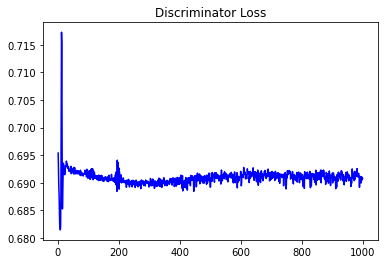

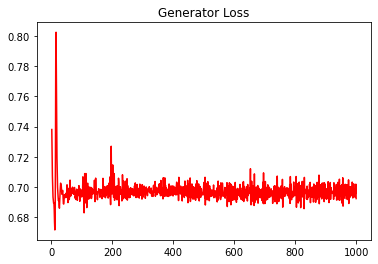

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.24698163175510346


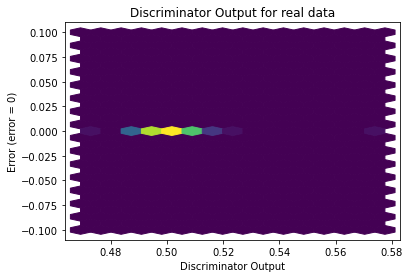

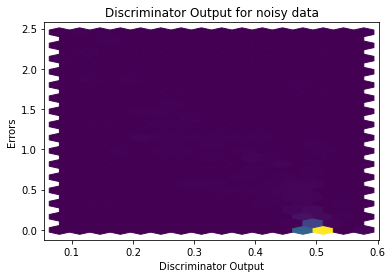

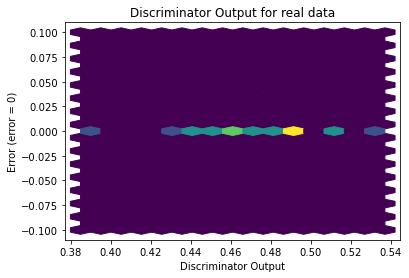

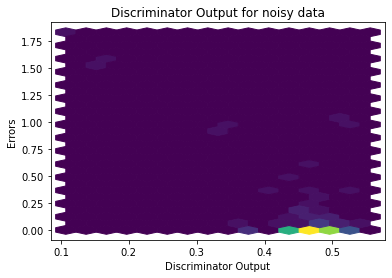

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


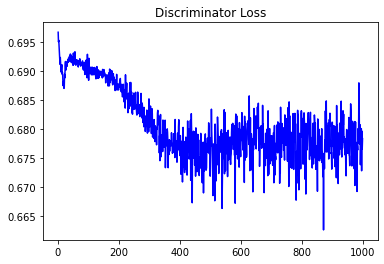

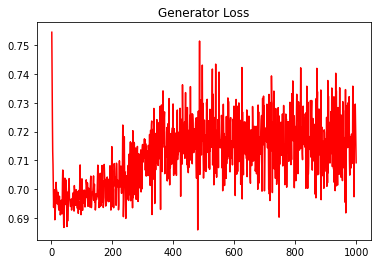

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.19561468517746755


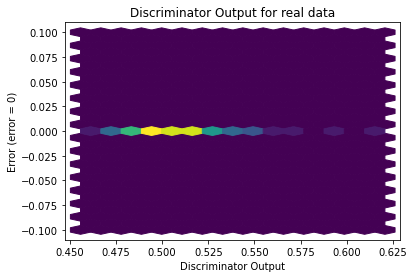

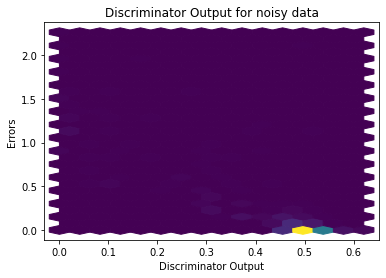

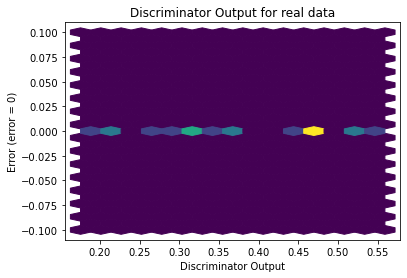

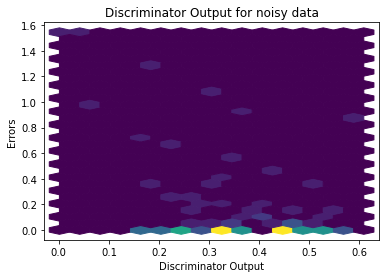

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4766]], requires_grad=True)
